# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
                
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Шаг 2. Предобработка данных

In [3]:
nans_1 = df.isna().sum().to_frame().rename(columns={0: "Пропуски до обработки"}).reset_index()

In [4]:
#считаю пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#заполняю пропуски и изменяю типы данных
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

df['balcony'] = df['balcony'].fillna(0)

df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('float64')
df['parks_around3000'] = df['parks_around3000'].astype('int')

df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('float64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

df['floors_total'] = df['floors_total'].fillna(0)

df['locality_name']= df['locality_name'].fillna('не указан')

df['living_area'] = df['living_area'].astype('float64')
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

df['kitchen_area'] = df['kitchen_area'].astype('float64')
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'))


df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df\
    .isna()\
    .sum()\
    .to_frame()\
    .rename(columns={0: "Пропуски после обработки"})\
    .reset_index()\
    .merge(nans_1, on='index')\
    .rename(columns={'index':'Столбец'})\
    .set_index('Столбец')

,Пропуски после обработки,Пропуски до обработки
Столбец,,
total_images,0,0
last_price,0,0
total_area,0,0
first_day_exposition,0,0
rooms,0,0
ceiling_height,0,9195
floors_total,0,86
living_area,0,1903
floor,0,0


In [7]:
tmp_median = df['days_exposition'].median()

In [8]:
#продолжаю заполнять пропуски и изменять типы данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

df['last_price']=df['last_price'].astype('float64')

df['balcony']=df['balcony'].astype('float64')
df['balcony']=df['balcony'].astype('int')

df['floors_total'] = df['floors_total'].astype('float64')
df['floors_total'] = df['floors_total'].astype('int')

df['ceiling_height'] = df['ceiling_height'].astype('float64')

df['total_area'] = df['total_area'].astype('float64')

df['airports_nearest'] = df['airports_nearest'].astype('float64')
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('float64')
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['airports_nearest'].median())

df['parks_nearest'] = df['parks_nearest'].fillna(-1)
df['parks_nearest'] = df['parks_nearest'].astype('float64')

df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)
df['ponds_nearest'] = df['ponds_nearest'].astype('float64')

df['days_exposition']=df['days_exposition'].astype('float64')
df['days_exposition']=df['days_exposition'].fillna(df['days_exposition'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around

In [9]:
#заполняю is_apartment
df['is_apartment']=df['is_apartment'].fillna(False)
df['is_apartment']=df['is_apartment'].astype('bool')

Самый непонятный для меня столбец. Пыталась выявить аппартаменты исходя из жилой площади, тк в пояснениях к проекту написано, что: "апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания." Но не сошлось количество пропусков со значением жилой площади равной нулю. Тогда я предположила, что если человек продает аппартаменты, тогда он должен был обязательно указать этот параметр, а если обычную квартиру, то мог пропустить этот столбец, поэтому приняла решение заполнить пропуски значением False.

In [10]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

Кажется пропуски заполнила максимально и типы данных логичны.

In [11]:
#отсортировываю неправдоподобные значения
df = df.query('ceiling_height > 2.2 and ceiling_height < 5.5')
df = df.query('floors_total > 0')
df = df.query('rooms > 0')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23373 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23373 non-null int64
last_price              23373 non-null float64
total_area              23373 non-null float64
first_day_exposition    23373 non-null datetime64[ns]
rooms                   23373 non-null int64
ceiling_height          23373 non-null float64
floors_total            23373 non-null int64
living_area             23373 non-null float64
floor                   23373 non-null int64
is_apartment            23373 non-null bool
studio                  23373 non-null bool
open_plan               23373 non-null bool
kitchen_area            23373 non-null float64
balcony                 23373 non-null int64
locality_name           23373 non-null object
airports_nearest        23373 non-null float64
cityCenters_nearest     23373 non-null float64
parks_around3000        23373 non-null int64
parks_nearest           23373 non-null float64
ponds_around3

Отсортировала исходя из своей логики. Рассуждаю так, что потолок не должен быть очень маленьким, но и не больше 5,5 метров. Количество этажей и количество комнат не должно быть меньше 0. В результате убралось 326 строк.

In [12]:
df.pivot_table(index='rooms', values='kitchen_area', aggfunc=['mean', 'count'])

,mean,count
,kitchen_area,kitchen_area
rooms,,
1,9.499311,7998
2,9.880903,7896
3,11.162855,5786
4,13.453745,1175
5,17.974321,324
6,20.975288,104
7,21.761017,59
8,24.900000,12


Из сводной таблицы видно несколько неправдоподобных значений площади кухни (больше 100 кв метров). Решила ограничить это значение 30 кв метрами, как мне кажется это достаточно большое для кухни значение, я была бы в восторге если бы имела кухню такого размера.

#### Проверка значений с помощью boxplot

Text(0.5, 1.0, 'Boxplot для высоты потолков')

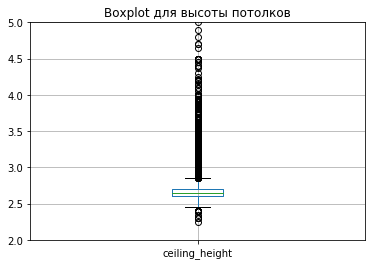

In [13]:
plt.ylim(2, 5)
df.boxplot('ceiling_height')
plt.title('Boxplot для высоты потолков', fontsize=12)

Text(0.5, 1.0, 'Boxplot для площади кухни')

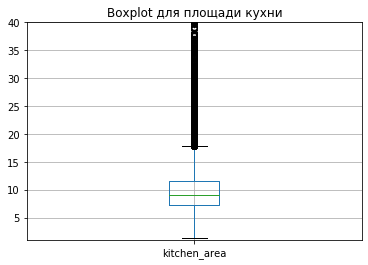

In [14]:
plt.ylim(1, 40)
df.boxplot('kitchen_area')
plt.title('Boxplot для площади кухни', fontsize=12)

Text(0.5, 1.0, 'Boxplot для жилой площади')

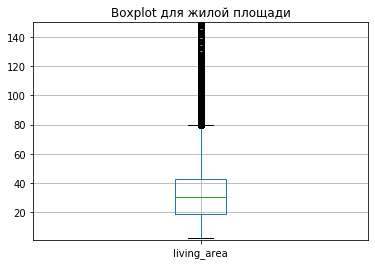

In [15]:
plt.ylim(1, 150)
df.boxplot('living_area')
plt.title('Boxplot для жилой площади', fontsize=12)

#### Сортировка аномальных значений
Построила боксплоты для потолка, площади кухни и жилой площади. Сначала отрезала по усам значения, но убралось несколько тысяч строк из таблицы, поэтому я все таки побоялась и решила оставить с запасом.

In [16]:
df = df.query('kitchen_area < 18')
df = df.query('living_area < 100')
df = df.query('rooms <= 7')
df = df.query('ceiling_height <= 3.5')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21539 entries, 1 to 23698
Data columns (total 22 columns):
total_images            21539 non-null int64
last_price              21539 non-null float64
total_area              21539 non-null float64
first_day_exposition    21539 non-null datetime64[ns]
rooms                   21539 non-null int64
ceiling_height          21539 non-null float64
floors_total            21539 non-null int64
living_area             21539 non-null float64
floor                   21539 non-null int64
is_apartment            21539 non-null bool
studio                  21539 non-null bool
open_plan               21539 non-null bool
kitchen_area            21539 non-null float64
balcony                 21539 non-null int64
locality_name           21539 non-null object
airports_nearest        21539 non-null float64
cityCenters_nearest     21539 non-null float64
parks_around3000        21539 non-null int64
parks_nearest           21539 non-null float64
ponds_around3

### Шаг 3. Посчитайте и добавьте в таблицу

In [17]:
#добавляю столбцы с ценой за кв метр, днем выставления объявления, месяцем, годом и днем недели
df['price_for_metr'] = df['last_price']/df['total_area']
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).day
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['weekday'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metr,day,month,year,weekday
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,-1.0,0,-1.0,81.0,82920.792079,4,12,2018,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785.714286,20,8,2015,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2,84.0,3,234.0,424.0,408176.100629,24,7,2015,4
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,-1.0,0,-1.0,55.0,95065.789474,10,9,2018,0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0,-1.0,0,-1.0,155.0,99195.710456,2,11,2017,3


Добавила в таблицу столбцы:

**price_for_metr** - цена за кв метр (отношение цены к жилой площади) 

**day** - день публикации объявления

**month** - месяц публикации объявления

**year** - год публикации объявления

**weekday** - день недели

In [18]:
def floor_txt (row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if (floor == last_floor) and (floor != 1):
        return 'последний'
    return 'другой'           

df['category_floor']=df.apply(floor_txt, axis=1)
df['category_floor'].sample(10)

20244       первый
6445        другой
14145       первый
12793       другой
14331       другой
1222        другой
9524     последний
11078       другой
4501        другой
3591        другой
Name: category_floor, dtype: object

Написала функцию для определения этажа, создала новый столбец с текстовым описанием этажа.

In [19]:
df['living_vs_total'] = df['living_area'] / df['total_area']
df['kitchen_vs_total'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_metr,day,month,year,weekday,category_floor,living_vs_total,kitchen_vs_total
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,-1.0,81.0,82920.792079,4,12,2018,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,92785.714286,20,8,2015,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,234.0,424.0,408176.100629,24,7,2015,4,другой,0.283019,0.059748
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,-1.0,55.0,95065.789474,10,9,2018,0,другой,0.473684,0.299342
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,-1.0,155.0,99195.710456,2,11,2017,3,другой,0.284182,0.386059


Добавила два столбца: отношение жилой площади к общей площади и площади кухни к общей площади.

#### Гистограммы для площади, цены, числа комнат, высоты потолков

Text(0, 0.5, 'Количество квартир')

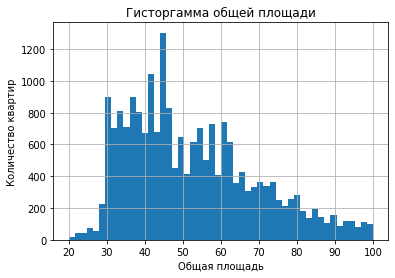

In [20]:
df.hist('total_area', bins=50, range = (20, 100))
plt.title('Гисторгамма общей площади', fontsize=12)
plt.xlabel("Общая площадь")
plt.ylabel("Количество квартир")

In [21]:
df['last_price'].min()

430000.0

In [22]:
df['last_price'].max()

150000000.0

Text(0, 0.5, 'Количество квартир')

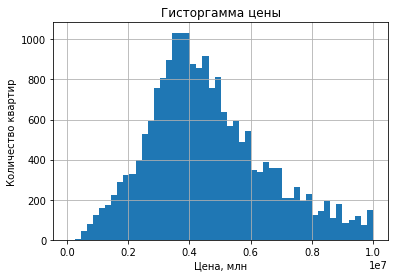

In [23]:
df.hist('last_price', bins = 50, range = (43000, 10000000))
plt.title('Гисторгамма цены', fontsize=12)
plt.xlabel("Цена, млн")
plt.ylabel("Количество квартир")

Text(0, 0.5, 'Количество квартир')

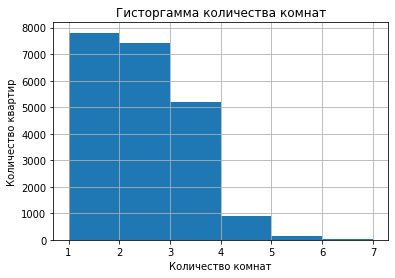

In [24]:
df.hist('rooms', bins = 6, range = (1, 7))
plt.title('Гисторгамма количества комнат', fontsize=12)
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")

Больше всего квартир с комнатами от 1 до 3.

Text(0, 0.5, 'Количество квартир')

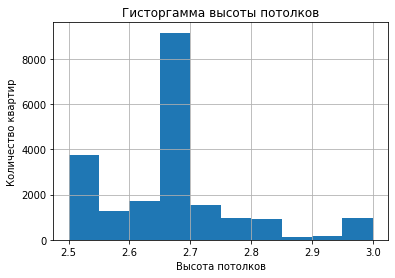

In [25]:
df.hist('ceiling_height', bins =10, range = (2.5, 3))
plt.title('Гисторгамма высоты потолков', fontsize=12)
plt.xlabel("Высота потолков")
plt.ylabel("Количество квартир")

Тоже все логично потолки высотой примерно 2,67 это стандарт.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Время продажи квартиры

In [26]:
df.pivot_table(index='rooms', values='days_exposition', aggfunc=('median', 'count'))

,count,median
rooms,,
1,7808,95.0
2,7429,95.0
3,5212,95.0
4,914,95.0
5,158,99.0
6,15,95.0
7,3,150.0


Однокомнатные квартиры продаются быстрее всего. Я думала, что с увеличением комнат медианное время продажи тоже должно увеличиваться, поэтому кажется страннным что 6 и 7 комнатные квартиры по времени продаются также как и трешки. И что 10 комнатные продались довольно быстро, но их всего 2, поэтому всякое может быть.

В основном все квартиры продаются до 4 месяцев.

Text(0.5, 1.0, 'Boxplot для количества дней с момента выставления объявления до снятия')

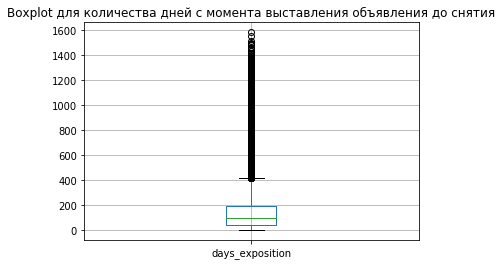

In [27]:
df.boxplot('days_exposition')
plt.title('Boxplot для количества дней с момента выставления объявления до снятия', fontsize=12)

Проверира разброс значений через boxplot

In [28]:
df=df.query('days_exposition < 500')

Отбросила аномально длительные значения

Text(0, 0.5, 'Количество квартир')

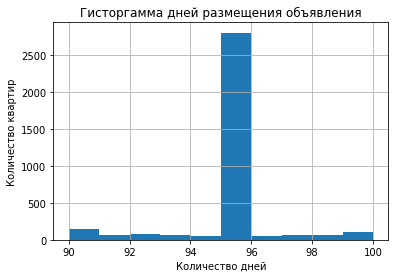

In [29]:
df.hist('days_exposition', bins =10, range = (90, 100))
plt.title('Гисторгамма дней размещения объявления', fontsize=12)
plt.xlabel("Количество дней")
plt.ylabel("Количество квартир")

In [30]:
df.query('days_exposition == 95').pivot_table(index=['year', 'month'], values='days_exposition', aggfunc='count')

days_exposition
year month                 
2014 11                   1
     12                   6
2015 1                    4
     2                    3
     3                    4
     4                    2
     5                    4
     6                    6
     8                    8
     9                    2
     10                   3
     11                   6
     12                   3
2016 1                    1
     2                    5
     3                    7
     4                    6
     5                   13
     6                    2
     7                    2
     8                    6
     9                    5
     10                   4
     11                   4
     12                   3
2017 1                    9
     2                   10
     3                    6
     4                   13
     5                   12
     6                   15
     7                   15
     8                   24
     9                   23
     10                  32
     11                  40
     12                  34
2018 1                   30
     2                   61
     3                   58
     4                   38
     5                   25
     6                   42
     7                   80
     8                   78
     9                   80
     10                 131
     11                 135
     12                  95
2019 1                  133
     2                  236
     3                  461
     4                  721
     5                   50

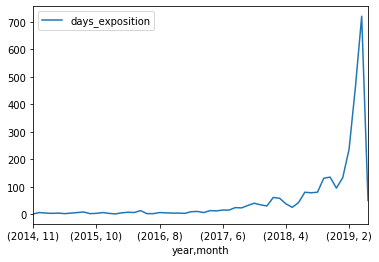

In [31]:
df.query('days_exposition == 95').pivot_table(index=['year', 'month'], values='days_exposition', aggfunc='count').plot()

Тут я выявила очень большое количество квартир, которые выставлялись ровно на 95 дней. Отсортировала по году. Выяснила что в 2019 году, по сравнению с предыдущими, было очень много объявлений, выставленных на 95 дней. Но я не понимаю, что с этим делать дальше, отбрасывать не хочется, там же остальные значения разные...

<a class="anchor" id="0-bullet">

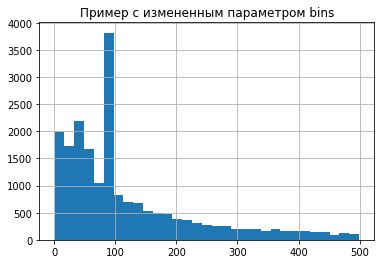

In [34]:
plt.title("Пример с измененным параметром bins")
plt.hist(df['days_exposition'], bins=31)
plt.grid(True)
plt.show()

### Зависимость цены

#### Зависимость цены от количества комнат в квартире

Text(0, 0.5, 'Цена, млн')

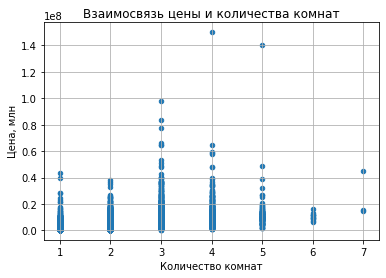

In [35]:
df.plot(x='rooms', y='last_price', kind='scatter', grid=True)
df['last_price'].corr(df['rooms'])
plt.title('Взаимосвязь цены и количества комнат', fontsize=12)
plt.xlabel("Количество комнат")
plt.ylabel("Цена, млн")

Подозрительно низкие цены у квартир с комнатами больше 8. Но возможно они в каком нибудь поселке.

#### Зависимость цены от общей площади квартиры

Text(0.5, 0, 'Площадь')

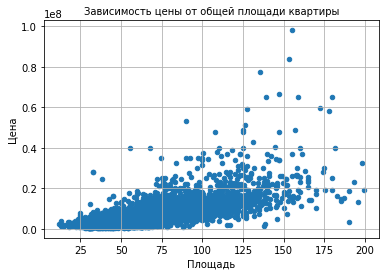

In [36]:
df.query('total_area <200').plot(x='total_area', y='last_price', kind='scatter', grid=True)
df['last_price'].corr(df['total_area'])
plt.title('Зависимость цены от общей площади квартиры', fontsize=10)
plt.ylabel("Цена")
plt.xlabel("Площадь")

Чем больше площадь, тем выше цена.

#### Зависимость цены от этажа

In [42]:
df.pivot_table(index='category_floor', values='last_price', aggfunc=('median', 'count'))

,count,median
category_floor,,
другой,14723,4600000.0
первый,2531,3800000.0
последний,2766,4100000.0


Цена квартир на 1 этаже ниже.

Text(0.5, 0, 'Этаж')

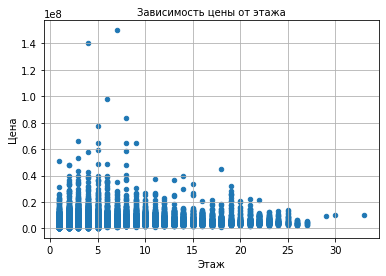

In [43]:
df.plot(x='floor', y='last_price', kind='scatter', grid=True)
df['last_price'].corr(df['floor'])
plt.title('Зависимость цены от этажа', fontsize=10)
plt.ylabel("Цена")
plt.xlabel("Этаж")

В основном скопление разброса цен в диапазоне от 0 до 10 этажа. Мне кажется это потому что в принципе домов с количеством этажей до 10 гораздо больше, чем многоэтажек высоких.

#### Зависимость цены от удаленности от центра

Text(0.5, 0, 'Удаленность от центра')

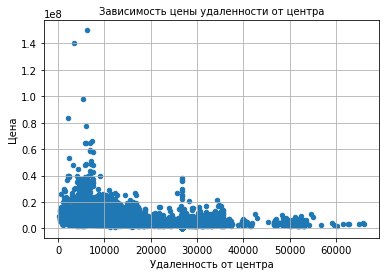

In [44]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True)
df['last_price'].corr(df['cityCenters_nearest'])
plt.title('Зависимость цены удаленности от центра', fontsize=10)
plt.ylabel("Цена")
plt.xlabel("Удаленность от центра")

Цена в центре больше.

,last_price,rooms,total_area,cityCenters_nearest
last_price,1.000000,0.395454,0.703525,-0.394200
rooms,0.395454,1.000000,0.765147,-0.132196
total_area,0.703525,0.765147,1.000000,-0.202854
cityCenters_nearest,-0.394200,-0.132196,-0.202854,1.000000


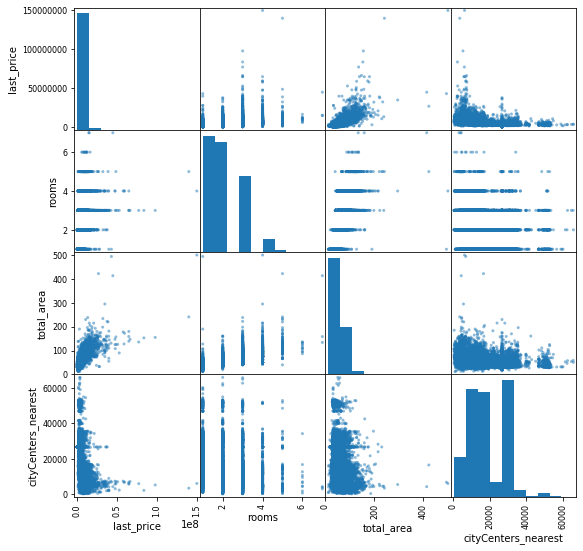

In [45]:
dfp = df[['last_price','rooms','total_area','cityCenters_nearest']]
pd.plotting.scatter_matrix(dfp, figsize=(9, 9))
dfp.corr()

Это я решила вставит все, чему в тренажере научилась.

#### Зависимость цены от даты размещения объявления

Text(0.5, 0, 'Количество дней')

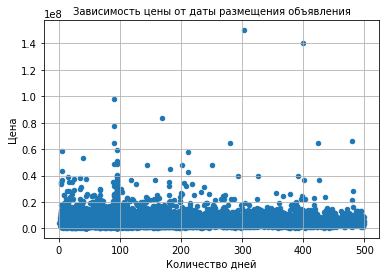

In [46]:
df.plot(x='days_exposition', y='last_price', kind='scatter', grid=True)
df['last_price'].corr(df['days_exposition'])
plt.title('Зависимость цены от даты размещения объявления', fontsize=10)
plt.ylabel("Цена")
plt.xlabel("Количество дней")

In [47]:
df.pivot_table(index=['year', 'month'], values='last_price', aggfunc=('median', 'count', 'mean'))

count          mean     median
year month                                
2014 11         1  8.200000e+06  8200000.0
     12         6  6.206667e+06  6850000.0
2015 1          4  6.450000e+06  3225000.0
     2          4  8.552500e+06  4830000.0
     3         21  6.124098e+06  4900000.0
     4         18  5.784037e+06  5219500.0
     5         19  4.875211e+06  3800000.0
     6         34  5.706765e+06  4300000.0
     7         36  1.230048e+07  5749500.0
     8         42  5.577756e+06  4410000.0
     9         28  6.092183e+06  5100000.0
     10        80  5.563544e+06  4620000.0
     11        85  6.186634e+06  5000000.0
     12        86  4.710585e+06  4200000.0
2016 1         87  6.987642e+06  4490000.0
     2        183  5.168089e+06  4500000.0
     3        241  5.421557e+06  4300000.0
     4        322  5.215295e+06  4384153.5
     5        336  5.553785e+06  4200000.0
     6        369  5.845857e+06  4300000.0
     7         88  4.730956e+06  4104050.0
     8         52  5.210885e+06  4075000.0
     9         64  6.128891e+06  4600000.0
     10        68  5.310683e+06  4375000.0
     11        71  5.013661e+06  4350000.0
     12        89  5.421584e+06  4600000.0
2017 1        238  5.536058e+06  4490000.0
     2        357  5.400388e+06  4390000.0
     3        157  5.279117e+06  4500000.0
     4        541  5.113349e+06  4435000.0
     5        475  4.978106e+06  4400000.0
     6        595  5.101853e+06  4150000.0
     7        492  5.058779e+06  4150000.0
     8        658  5.433545e+06  4350000.0
     9        868  5.384818e+06  4470000.0
     10       834  5.006491e+06  4177500.0
     11      1090  5.340014e+06  4400000.0
     12       816  5.293098e+06  4290000.0
2018 1        542  4.988231e+06  4200000.0
     2       1229  5.071172e+06  4250000.0
     3        949  4.941752e+06  4150000.0
     4        283  5.206375e+06  4390000.0
     5        138  5.144151e+06  4500000.0
     6        485  4.790791e+06  4270000.0
     7        796  5.221955e+06  4562500.0
     8        758  5.437923e+06  4550000.0
     9        712  5.347744e+06  4470000.0
     10       848  5.286911e+06  4599500.0
     11       769  5.320526e+06  4680000.0
     12       336  5.560126e+06  4981168.0
2019 1        393  5.614938e+06  4880000.0
     2        501  5.669478e+06  5000000.0
     3        797  5.554002e+06  4800000.0
     4        878  5.591439e+06  4900000.0
     5         51  5.781724e+06  4450000.0

Text(0.5, 0, 'Дата')

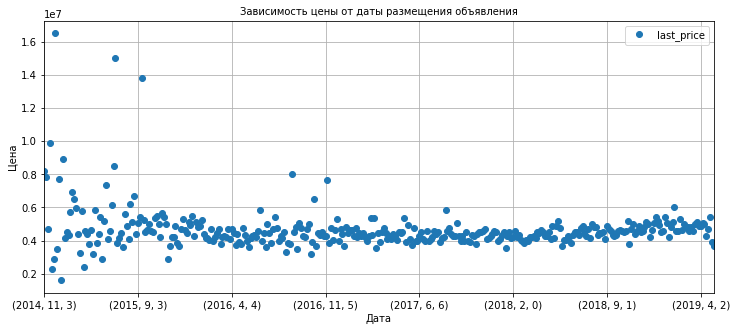

In [48]:
df.pivot_table(index=['year', 'month', 'weekday'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5), style='o')
plt.title('Зависимость цены от даты размещения объявления', fontsize=10)
plt.ylabel("Цена")
plt.xlabel("Дата")

Какие то большие выбросы в цене в 2014 году. Судя по сводной таблице это потому что были выставлены на продажу очень дорогие квартиры.

#### Зависимость по населенным пунктам

In [1]:
# ищу 10 населенных пунктов с самой высокой ценой за кв метр
df1=df
df1['count_flat'] = 1 #так я буду считать количесвто объявлений(квартир)
df_stat=(df1.pivot_table(index='locality_name', values=['price_for_metr', 'count_flat'], aggfunc=('sum')))
df_stat.columns=['count', 'sum_price'] # получила количесвто объявлений по каждому населенному пункту и сумму цен за кв метр
big_locality = df_stat.sort_values(by='count', ascending=False).head(10) # выбрала 10 населенных пунктов с самым большим количеством объявлений
big_locality['mean_price']=big_locality['sum_price']/big_locality['count'] # для этих 10 посчитала среднюю цену за кв метр разделив сумму цен на количесвто объявлений
big_locality['mean_price']

NameError: name 'df' is not defined

В Санкт-Петербурге самая большая цена за кв метр.
Муринцы негодуют, это уже не поселок, а город, как и Кудрово!
Возможно я тут намудрила, но как по другому сделать не сообразила.

In [50]:
df\
    .groupby('locality_name')\
    .agg({'last_price':'mean', 'total_area':'mean', 'kitchen_area':'count'})\
    .rename(columns={'kitchen_area':'cnt'})\
    .assign(price_per_m2 = lambda row: row['last_price'] / row['total_area'])\
    .sort_values(by='cnt', ascending=False).head(10)\
    .sort_values(by='price_per_m2', ascending=False)\
    .rename(columns={
    'last_price': "Цена, руб",
    'total_area': "Общая площадь, м2",
    'price_per_m2': "Цена за м2, руб/м2",
    'cnt': "Кол-во объявлений"
})

,"Цена, руб","Общая площадь, м2",Кол-во объявлений,"Цена за м2, руб/м2"
locality_name,,,,
Санкт-Петербург,6.353370e+06,57.038416,12926,111387.566584
Пушкин,5.644379e+06,55.604744,312,101508.943159
деревня Кудрово,4.267061e+06,46.559696,230,91647.092793
посёлок Парголово,4.493339e+06,51.090912,296,87947.908769
посёлок Мурино,3.659999e+06,43.988396,449,83203.727547
посёлок Шушары,4.100786e+06,53.975332,407,75975.192917
Колпино,3.801956e+06,51.627057,316,73642.711756
Гатчина,3.434871e+06,50.069638,276,68601.871886
Всеволожск,3.780401e+06,56.232911,347,67227.549785


<hr style="border: 2px solid orange;" />

In [51]:
df1.pivot_table(index='locality_name', values=['price_for_metr', 'count_flat'], aggfunc=('mean')).sort_values(by='price_for_metr').head(10)

,count_flat,price_for_metr
locality_name,,
деревня Старополье,1,11206.221198
посёлок станции Свирь,1,11481.481481
деревня Вахнова Кара,1,11688.311688
деревня Выскатка,1,12335.480902
поселок Совхозный,1,12629.129129
деревня Малая Романовка,1,12724.550898
поселок Тёсово-4,1,12931.034483
деревня Бор,1,13157.894737
деревня Сижно,1,13709.677419


Тут представлено 10 населенных пунктов с самой низкой ценой за квадратный метр, также у каждого населенного пункта по одному объявлению о продаже.

### Зависимость от расстояния до центра Санкт-Петербурга

#### Выявление центра в км

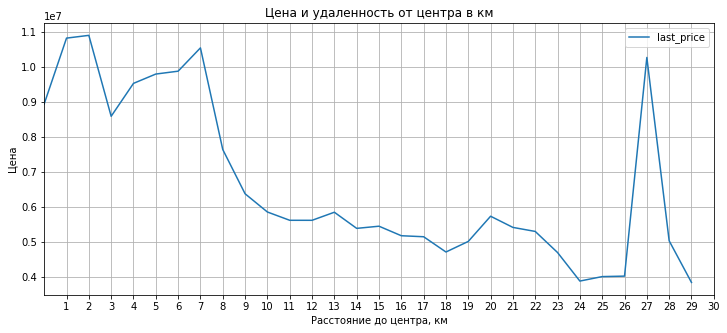

In [60]:
#добавляю новый столбец с срасстояние до центра в км и округляю его

length=30
xmarks=[i for i in range(1,length+1,1)]

df['center_km']=round(df['cityCenters_nearest']/1000)

(df
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='center_km', values='last_price')
     .plot(grid=True, figsize=(12, 5), title='Цена и удаленность от центра в км')
)
plt.ylabel("Цена")
plt.xlabel("Расстояние до центра, км")
plt.xticks(xmarks)
plt.show();

Тут вроде бы цена падает чем дальше от центра, но потом ненадолго поднимается. Я как житель Санкт-Петербурга, думаю что это квартиры на Крестовском острове, потому что они вроде как далековато от исторического центра, но цена там очень большая. График резко уходит вниз примерно после 7 км, на мой взгляд в пределах 7 км это центр.

#### Сводная таблица средней цены в зависимости от км от центра города

In [53]:
(df
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='center_km', values='last_price', aggfunc='median'))

,last_price
center_km,
0.0,7600000.0
1.0,9500000.0
2.0,8945000.0
3.0,7370000.0
4.0,7970000.0
5.0,8166500.0
6.0,7610000.0
7.0,6750000.0
8.0,6520000.0


#### Зависимость цены в центре города от общей площади квартиры

Text(0.5, 0, 'Общая площадь, кв м')

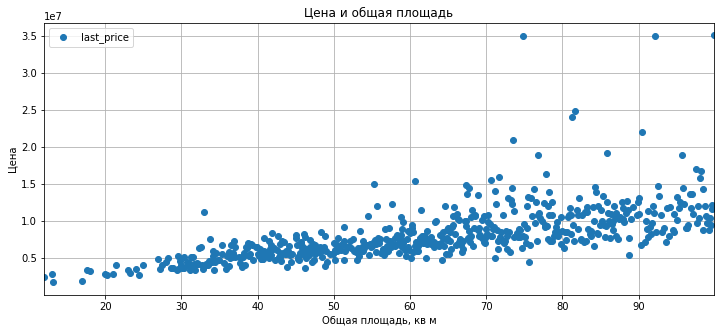

In [54]:
center = 7

(df
     .query('locality_name == "Санкт-Петербург" and center_km <=@center and total_area < 100')
     .pivot_table(index='total_area', values='last_price')
     .plot(grid=True, figsize=(12, 5), title='Цена и общая площадь', style='o')
)
plt.ylabel("Цена")
plt.xlabel("Общая площадь, кв м")

Цена растет в зависимости от площади.

#### Зависимость цены в центре города от количества комнат

Text(0.5, 0, 'Количество комнат')

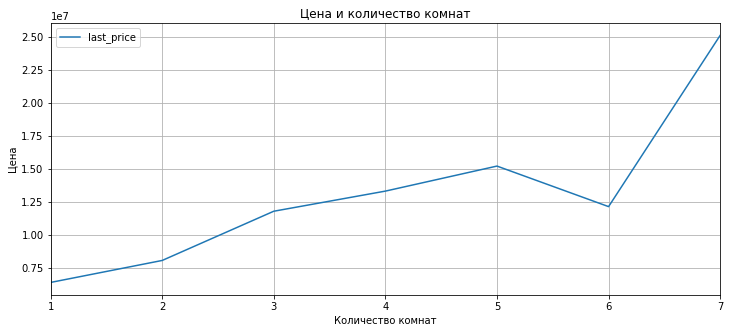

In [55]:
(df
     .query('locality_name == "Санкт-Петербург" and center_km <=@center')
     .pivot_table(index='rooms', values='last_price')
     .plot(grid=True, figsize=(12, 5), title='Цена и количество комнат')
)
plt.ylabel("Цена")
plt.xlabel("Количество комнат")


6-комнатные выбиваются из общей тенденции.

#### Зависимость цены в центре города от высоты потолков

Text(0.5, 0, 'Высота потолков')

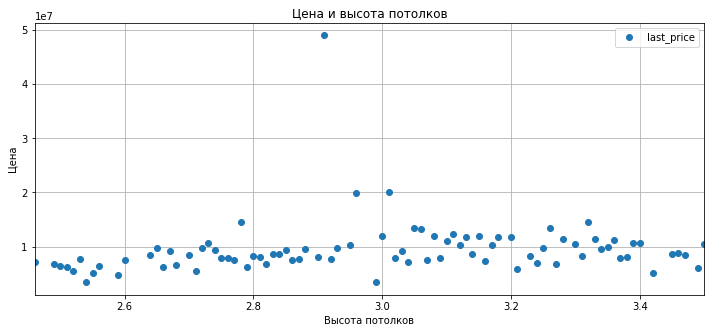

In [56]:
(df
     .query('locality_name == "Санкт-Петербург" and center_km <=@center')
     .pivot_table(index='ceiling_height', values='last_price')
     .plot(grid=True, figsize=(12, 5),  title='Цена и высота потолков', style='o')
)
plt.ylabel("Цена")
plt.xlabel("Высота потолков")

Если рассматривать цену и высоту потолков, то я бы не сказала что тут есть прямопропорциональная зависимоть.
На графике есть выбросы, но мы не знаем сколько в этой квартире например комнат. 

#### Сводная таблица по центру города

In [57]:
(df
     .query('locality_name == "Санкт-Петербург" and center_km <=@center')
     .pivot_table(index='rooms', values=['last_price', 'total_area', 'ceiling_height'], aggfunc='median'))

,ceiling_height,last_price,total_area
rooms,,,
1,2.650,5777000.0,40.00
2,2.700,6999000.0,59.00
3,2.800,8990000.0,82.00
4,2.900,10300000.0,101.90
5,3.000,11700000.0,120.55
6,2.775,11897500.0,110.50
7,2.650,15350000.0,158.50


Для меня до 7 комнат все показатели выглядят правдоподобно.

In [58]:
df2=df.query('locality_name == "Санкт-Петербург" and center_km <=@center')
df2['rooms'].value_counts()

2    752
3    714
1    411
4    286
5     66
6      6
7      3
Name: rooms, dtype: int64

Вначале я думала что квартир с 7 комнатами довольно много и их не надо исключать, но в результате сортировок, оказалось не так.

### Шаг 5. Общий вывод
* Цена сильно зависит от площади, от количесвта комнат (что то же самое что площадь), от удаленности от центра города.
* Вышеперечисленные показатели являются ключевыми также для квартир, расположенных в центре города.
* Прямой зависимотсти цены от высоты потолка я не обнаружила.
* И в центре города и не в центре цена зависит от площади квартиры и количества комнат.
* Я бы добавила в исходные данные столбец "удаленность от метро", мне кажется он бы влиял на цену.